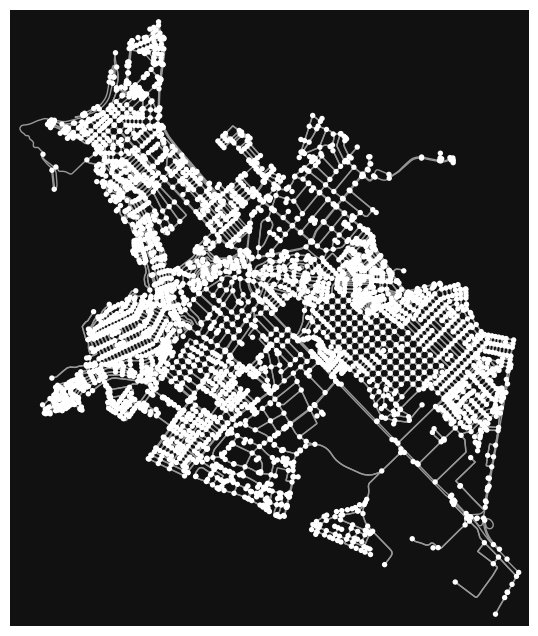

[310954593, 371264086, 371264146, 1229283791, 1229283812, 1229283814, 1229283783, 1229283774, 310954666, 310954831, 310954851, 309583819, 309583820, 3725509380, 304905076, 2833197405, 2833197404, 4344516896, 10185204422, 1273684022, 1273756642, 1757657109, 3826958683, 1273822090, 1273677045, 1757657108, 558581084, 3826958684, 1757646152, 1273892791, 1273804203, 1827979614, 1757646163, 346474408, 1273535735, 1273793827, 5481444553, 4351706138, 4351357317, 304905124, 3762100003, 4354896824, 860682663, 306073850, 306073564, 1229283771, 2833643631, 5008490469, 4232976302, 1783964576, 10702384417, 309583598, 1701366828, 1229283766, 1229283788, 1836968862, 3574806293, 4351598077, 1836968859, 1273730904, 1273870334, 6086163064, 6086163063, 306073641, 9190624999, 1229111515, 1229111516, 9188530454, 10962876749, 2833643636, 309583231, 2833238368, 306073825, 306073828, 306073869, 306073850, 306073564, 2132998598, 4299157508, 859740295, 860682583, 1847875264, 860682522, 860682579, 4226733444, 422

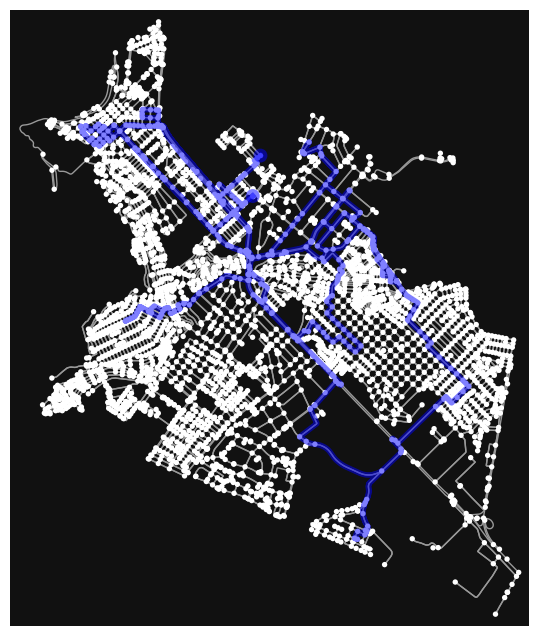

La distancia total de la ruta propuesta es de 61918.661208206264 metros.


In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import sklearn
import math

# Obtener el grafo
place_name = "Chorrillos, Lima, Peru"
G = ox.graph_from_place(place_name, network_type='drive')

# Obtener iglesias
tags  = {'amenity': 'place_of_worship', 'religion': 'christian'}  # Tags para buscar iglesias
churches= ox.features_from_place(place_name, tags)
churches = churches[churches.geometry.type == 'Point']

# Convertir los nodos a un DataFrame
#nodes, edges = ox.graph_to_gdfs(G)

# Visualizar el gráfico de red
fig, ax = ox.plot_graph(G)
plt.show()

church_nodes = []
for idx, church in churches.iterrows():
    point = church.geometry
    nearest_node = ox.nearest_nodes(G, point.x, point.y)  # Usamos nearest_nodes
    church_nodes.append(nearest_node)

# Función para encontrar la ruta BFS entre dos nodos
def bfs_path(graph, start, goal):
    # Genera un árbol BFS desde el nodo de inicio
    bfs_tree = nx.bfs_tree(graph, source=start)
    # Si el nodo objetivo es alcanzable, devuelve el camino, si no, devuelve None
    try:
        path = nx.shortest_path(bfs_tree, source=start, target=goal)
        return path
    except nx.NetworkXNoPath:
        return None

# Implementar BFS para recorrer las iglesias
route = []
current_node = church_nodes[0]
for next_node in church_nodes[1:]:
    path = bfs_path(G, current_node, next_node)
    if path:
        route.extend(path[:-1])  # Evitar duplicar nodos
    current_node = next_node

# Agregar el último segmento para cerrar el ciclo
route.append(current_node)
print(route)

# Dibujar el grafo
fig, ax = ox.plot_graph(G, show=False, close=False)
route_edges = list(zip(route[:-1], route[1:]))
nc = ['r' if node in route else 'b' for node in G.nodes()]
ox.plot_graph_route(G, route, route_color='blue', orig_dest_node_color='red', node_color=nc, ax=ax)
plt.show()

def calculate_route_length(route, graph):
    length = 0.0
    for i in range(len(route) - 1):
        edge_data = graph.get_edge_data(route[i], route[i+1])
        length += edge_data[0]['length']  # Asume que la longitud está en edge_data[0]['length']
    return length

# Suponiendo que 'route' es la lista de nodos de tu ruta ya calculada
total_length = calculate_route_length(route, G)
print(f"La distancia total de la ruta propuesta es de {total_length} metros.")
